

# Item 3 do mini-projeto - Detecção, reconhecimento e filtragem de sinais.
---
> **Detector por produto interno (entrega: slides e código)**




> **Objetivo:** *Encontrar determinado padrão na imagem proposta utilizando Detector por produto interno.*


---

Imagem proposta:





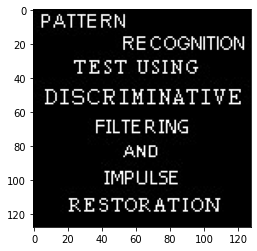

---
Padrão a ser encontrado:


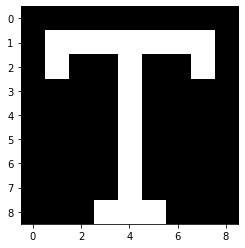

# **1. Importar bibliotecas necessárias para implementação**



In [44]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time

# **2.   Importar imagem que contém o padrão a ser encontrado e gerar as classes para o classificador**



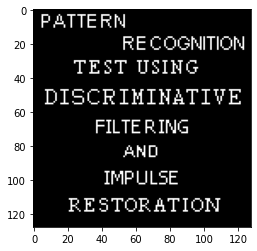

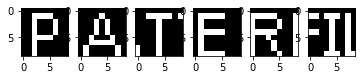

(9, 9)


In [45]:
img = cv2.imread('imagem.jpg', 0)
new_image = ((cv2.threshold(img,127,255,cv2.THRESH_BINARY)[1])/255)
plt.imshow(new_image,cmap='gray')
imagem_1 = new_image[2:11,3:12]
imagem_2 = new_image[2:11,11:20]
imagem_3 = new_image[2:11,18:27]
imagem_4 = new_image[2:11,31:40]
imagem_5 = new_image[2:11,40:49]
imagem_6 = new_image[64:73,40:49]

f = plt.figure()
f.add_subplot(1,6,1)
plt.imshow(imagem_1,cmap= 'gray')
f.add_subplot(1,6,2)
plt.imshow(imagem_2,'gray')

f.add_subplot(1,6,3)
plt.imshow(imagem_3,'gray')

f.add_subplot(1,6,4)
plt.imshow(imagem_4,'gray')

f.add_subplot(1,6, 5)
plt.imshow(imagem_5,'gray')

f.add_subplot(1,6, 6)
plt.imshow(imagem_6,'gray')

plt.show(block=True)
print(imagem_6.shape)


# **3. Gerar o padrão a ser encontrado na imagem proposta**



(9, 9)
<class 'numpy.ndarray'>


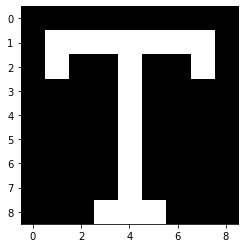

In [46]:
u_line0 = np.zeros(9)
u_line1 = [0,1,1,1,1,1,1,1,0]
u_line2 = [0,1,0,0,1,0,0,1,0]
u_line3 = [0,0,0,0,1,0,0,0,0]
u_line4 = [0,0,0,0,1,0,0,0,0]
u_line5 = [0,0,0,0,1,0,0,0,0]
u_line6 = [0,0,0,0,1,0,0,0,0]
u_line7 = [0,0,0,0,1,0,0,0,0]
u_line8 = [0,0,0,1,1,1,0,0,0]

pattern = np.array([u_line0,u_line1,u_line2,u_line3,u_line4,u_line5,u_line6,u_line7,u_line8],dtype=int)
print(pattern.shape)   
print(type(pattern))
plt.imshow(pattern, cmap='gray')

# **4. Transformar as imagens correspondentes às classes de imagens em uma dimensão.**


In [47]:
flat_1 = np.reshape(imagem_1,(81,1))
flat_2 = np.reshape(imagem_2,(81,1))
flat_3 = np.reshape(imagem_3,(81,1))
flat_4 = np.reshape(imagem_4,(81,1))
flat_5 = np.reshape(imagem_5,(81,1))
flat_6 = np.reshape(imagem_6,(81,1))
flat_7 = np.reshape(pattern,(81,1))

In [48]:
all_flat = np.concatenate((flat_1,flat_2,flat_3,flat_4,flat_5,flat_6,flat_7),axis=1)
flat_1.transpose().shape
flat_1
all_flat.shape


(81, 7)

# **5. Gerando a resposta desejada para o classificador. (A última imagem é o padrão desejado)**

In [49]:
saida = np.array([0,0,0,0,0,0,1])
saida = np.reshape(C,(1,7))

In [50]:
all_flat_t = all_flat.transpose()
inv = np.linalg.inv(np.matmul(all_flat_t,all_flat))
h = np.matmul(np.matmul(all_flat,inv),saida.transpose())

# **7 Realização do produto interno por toda a imagem.**


In [51]:
imagem_filtrada = new_image
padding = np.zeros((146,146)) 
padding[9:-9,9:-9] = imagem_filtrada[:,:]
imagem_filtrada = padding
subimage_line=0
tempo_inicial = time.clock()
for i in range(9,imagem_filtrada.shape[0]-9):
  subimage_col=0
  for j in range(9,imagem_filtrada.shape[1]-9):
    B = imagem_filtrada[subimage_line:i,subimage_col:j]
    B = np.reshape(B,(81,1))
    probabildade = np.matmul(h.transpose(),B)[0]
    if (probabildade>=0.75):      
      result = np.ones((9,9))
      result[1:-1,1:-1] = 0
      imagem_filtrada[subimage_line:i,subimage_col:j] = result
    subimage_col+=1   
  subimage_line+=1
print("tempo decorrido",time.clock()-tempo_inicial)

tempo decorrido 0.19990800000000064


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


# **8. Resultado da filtragem**

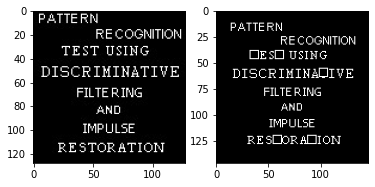

In [52]:
f = plt.figure()
f.add_subplot(1,2, 1)
plt.imshow(img,cmap= 'gray')
f.add_subplot(1,2, 2)
plt.imshow(imagem_filtrada,'gray')
plt.show(block=True)